In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import os
import xml.etree.ElementTree as ET
%matplotlib inline

In [2]:
def Processing_XML_Reviews_Dictionnaire(ListReviews):
    count = 0
    Review = []
    Reviews = {}
    for i in range(len(ListReviews)):
        if ListReviews[i] != '</review>\n':
            if ListReviews[i] == '<review>\n' and ListReviews[i+1] == '<unique_id>\n':
                # unique_id
                Review.append('unique_id/'+ListReviews[i+2])
            #if ListReviews[i] == '</unique_id>\n' and ListReviews[i+1] == '<unique_id>\n':
                #unique_idN
                #Review.append('unique_id/'+ListReviews[i+2])
            if  ListReviews[i] == '<asin>\n':
                #asin
                Review.append('asin/'+ListReviews[i+1])    
            if  ListReviews[i] == '<product_name>\n':
                #productName
                Review.append('product_name/'+ListReviews[i+1])
            #if  ListReviews[i] == '</product_type>\n' and ListReviews[i+1] == '<product_type>\n' :
                #here we append the producttype
                #Review.append('product_type/'+ListReviews[i+2])
            if ListReviews[i] == '<helpful>\n':
                #helpful
                Review.append('helpful/'+ListReviews[i+1])
            if ListReviews[i] == '<rating>\n':
                Review.append('rating/'+ListReviews[i+1])
            if ListReviews[i] == '<title>\n':
                Review.append('title/'+ListReviews[i+1])
            if ListReviews[i] == '<date>\n':
                Review.append('date/'+ListReviews[i+1])
            if ListReviews[i] == '<reviewer>\n':
                Review.append('reviewer/'+ListReviews[i+1])
            if ListReviews[i] == '<reviewer_location>\n':
                Review.append('reviewer_location/'+ListReviews[i+1])
            if ListReviews[i] == '<review_text>\n':
                Review.append('review_text/'+ListReviews[i+1])
        elif ListReviews[i] == '</review>\n':
            count = count + 1
            r = 'review'+ str(count) 
            Reviews[r] = Review
            #nfargou list
            Review = []
    return Reviews

In [3]:
def Porcessing_Dictonnary_ToDataFrame(Dict):
    #on prepare notre dataframe pour les données
    df = pd.DataFrame(columns=['unique_id','asin','product_name','helpful','rating','title',
                    'date','reviewer','reviewer_location','review_text'])
    count = 0
    for i,k in Dict.items():
        df.loc[count] = [k[0].split("/")[1].split("\n")[0],k[1].split("/")[1].split("\n")[0]
                              ,k[2].split("/")[1].split("\n")[0],k[3].split("/")[1].split("\n")[0]
                              ,k[4].split("/")[1].split("\n")[0],k[5].split("/")[1].split("\n")[0]
                              ,k[6].split("/")[1].split("\n")[0],k[7].split("/")[1].split("\n")[0]
                              ,k[8].split("/")[1].split("\n")[0],k[9].split("/")[1].split("\n")[0]
        ]
        count = count + 1

    return df

In [4]:
import os
indir = 'sorted_data/'
PositifReviews = []
NegativeReviews = []
for root, dirs, filenames in os.walk(indir):
    #print(root,dirs,filenames)
    for f in filenames:
        #log = open(os.path.join(root, f), 'r').readlines()
        #print(os.path.join(root, f))
        #filee = open(log,'r').readlines()
        if f == "positive.review":
            log = open(os.path.join(root, f), 'r').readlines()
            PositifReviews.append(Processing_XML_Reviews_Dictionnaire(log))
            #print(log)
            print(os.path.join(root, f))
        if f == "negative.review":
            log = open(os.path.join(root, f), 'r').readlines()
            NegativeReviews.append(Processing_XML_Reviews_Dictionnaire(log))
            #print(log)
            print(os.path.join(root, f))

sorted_data/apparel\negative.review
sorted_data/apparel\positive.review
sorted_data/automotive\negative.review
sorted_data/automotive\positive.review
sorted_data/baby\negative.review
sorted_data/baby\positive.review
sorted_data/beauty\negative.review
sorted_data/beauty\positive.review
sorted_data/books\negative.review
sorted_data/books\positive.review
sorted_data/camera_&_photo\negative.review
sorted_data/camera_&_photo\positive.review
sorted_data/cell_phones_&_service\negative.review
sorted_data/cell_phones_&_service\positive.review
sorted_data/computer_&_video_games\negative.review
sorted_data/computer_&_video_games\positive.review
sorted_data/dvd\negative.review
sorted_data/dvd\positive.review
sorted_data/electronics\negative.review
sorted_data/electronics\positive.review
sorted_data/gourmet_food\negative.review
sorted_data/gourmet_food\positive.review
sorted_data/grocery\negative.review
sorted_data/grocery\positive.review
sorted_data/health_&_personal_care\negative.review
sorted_da

In [5]:
print(len(PositifReviews))
print(len(NegativeReviews))
print(len(PositifReviews[1]))# automotive/positive.review	 584
print(len(PositifReviews[2]))#baby/positive.review		1000

25
25
584
1000


In [6]:
df_24_Postif = pd.DataFrame(columns=['unique_id','asin','product_name','helpful','rating','title',
                    'date','reviewer','reviewer_location','review_text'])
df_24_Negatif = pd.DataFrame(columns=['unique_id','asin','product_name','helpful','rating','title',
                    'date','reviewer','reviewer_location','review_text'])
df = pd.DataFrame()

for Rev in PositifReviews:
    print(Rev['review1'])
    df = Porcessing_Dictonnary_ToDataFrame(Rev)
    #print(len(df))
    #print(df.head(n=2))
    df_24_Postif = pd.concat([df_24_Postif, df])
    df.empty

['unique_id/B0007QCQA4:good_sneakers:christopher_w._damico_"macman"\n', 'asin/B0007QCQA4\n', "product_name/adidas Originals Men's Superstar II Basketball Shoe: Apparel\n", 'helpful/0 of 1\n', 'rating/4.0\n', 'title/GOOD SNEAKERS\n', 'date/July 15, 2006\n', 'reviewer/Christopher W. Damico "MACMAN"\n', 'reviewer_location/NYC\n', "review_text/GOOD LOOKING KICKS IF YOUR KICKIN IT OLD SCHOOL LIKE ME. AND COMFORTABLE. AND RELATIVELY CHEAP. I'LL ALWAYS KEEP A PAIR OF STAN SMITH'S AROUND FOR WEEKENDS\n"]
['unique_id/B0009N4F6I:works_very_well:i_have_9_cats\n', 'asin/B0009N4F6I\n', 'product_name/Wedgie Cup Holder: Automotive\n', 'helpful/1 of 1\n', 'rating/5.0\n', 'title/Works very well\n', 'date/August 19, 2006\n', 'reviewer/I have 9 cats\n', 'reviewer_location/Dela where?\n', "review_text/I bought one today for my Mazda Tribute because I didn't like the built-in cup holders. It's actually very sturdy and fits very well.\n"]
['unique_id/B0002U1SFE:love_it!:a._kurczewski\n', 'asin/B0002U1SFE\n'

['unique_id/B000EX8N3E:outstanding_in_almost_every_way:b._siao\n', 'asin/B000EX8N3E\n', "product_name/Casio Men's G-Shock Atomic Solar Watch # MTG920DA-1: Jewelry & Watches: Casio\n", 'helpful/\n', 'rating/5.0\n', 'title/Outstanding In Almost Every Way\n', 'date/November 9, 2006\n', 'reviewer/B. Siao\n', 'reviewer_location/San Diego, CA\n', 'review_text/Elegant yet tough, this particular Casio has a metal bracelet and is extremely comfortable to wear.  The display is sharp, clear, and very easy to read.  I only wish it had a thermometer.  The watch is big and looks very macho on your wrist\n']
['unique_id/B0002D31QU:immediate_results!:a._sanford\n', 'asin/B0002D31QU\n', 'product_name/Premier Gentle Spray Anti-Bark Dog Collar: Kitchen & Housewares\n', 'helpful/1 of 1\n', 'rating/5.0\n', 'title/Immediate results!\n', 'date/October 24, 2006\n', 'reviewer/A. Sanford\n', 'reviewer_location/Blacksburg, VA USA\n', "review_text/My grandma's 10 year old Yorkie just would never shut up.  He bark

In [7]:
df1 = pd.DataFrame()
for Rev in NegativeReviews:
    #print(Reviews['review1'])
    df1 = Porcessing_Dictonnary_ToDataFrame(Rev)
    #print(len(df))
    #print(df.head(n=2))
    df_24_Negatif = pd.concat([df_24_Negatif, df1])
    df1.empty

In [8]:
print(len(df_24_Negatif))
df_24_Postif.describe()
df_24_Negatif.describe()

16576


,unique_id,asin,product_name,helpful,rating,title,date,reviewer,reviewer_location,review_text
count,16576,16576,16576,16576,16576,16576,16576,16576,16576,16576
unique,15442,10905,10760,908,2,13359,1664,13427,5730,14661
top,B00005OLX1:sucks_sucks:jason,B00099QAQK,TIME [6-month subscription] [with $5 Bonus]: M...,,1.0,Disappointed,"January 9, 2007",,,
freq,4,18,20,2748,10443,78,216,452,3572,61


In [9]:
df_24_Postif['Class'] = "pos" # review positives
df_24_Negatif['Class'] = "neg" #review Negatif
Reviews  = pd.concat([df_24_Postif,df_24_Negatif])
Reviews.drop('unique_id',axis=1,inplace=True)

In [10]:
Reviews.iloc[0,8]

"GOOD LOOKING KICKS IF YOUR KICKIN IT OLD SCHOOL LIKE ME. AND COMFORTABLE. AND RELATIVELY CHEAP. I'LL ALWAYS KEEP A PAIR OF STAN SMITH'S AROUND FOR WEEKENDS"

In [8]:
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.tokenize import RegexpTokenizer


#nltk.download()
#nltk.download('punkt')
def tokenize_words_Sents(Sent):
    return word_tokenize(Sent),sent_tokenize(Sent)
def tokenize_words(Sent):
    return word_tokenize(Sent)   
def RegExpTokenizer(Sent):
    tokenizer = RegexpTokenizer(r'\w+')
    return tokenizer.tokenize(Sent)

Words,Sents = tokenize_words_Sents(Reviews.iloc[0,8])
print("Words ",Words)
print("Sents ",Sents)

NameError: name 'Reviews' is not defined

In [12]:
from nltk.corpus import stopwords
#nltk.download('stopwords')
def Eliminate_Stop_Words(Sent):
    stop_words = set(stopwords.words("english"))
    filtered_words = []
    for w in Sent:
        if w not in stop_words:
            filtered_words.append(w)
    return stop_words,filtered_words

def Eliminate_Stop_Word(Sent):
    stop_words = set(stopwords.words("english"))
    filtered_words = []
    for w in Sent:
        if w not in stop_words:
            filtered_words.append(w)
    return filtered_words

stop_words,filtered_words = Eliminate_Stop_Words(Words)
print(stop_words)
print("------------------Words ------------------------")
print(Words)
print("------------------Words filltred---------------------")
print(filtered_words)

{'been', 'now', 'wasn', "mightn't", 'they', 'above', "couldn't", "won't", 'being', 'am', 'because', 'from', 'again', 'why', 've', 'didn', 'doesn', 'hadn', "weren't", 'she', 'weren', 'ourselves', "wasn't", 'during', 's', 'were', 'll', 'further', 'have', 'just', 'about', 'here', 'and', 'not', 'so', 'are', 'with', "you'll", 'by', "don't", 'be', 'through', 'an', 'o', 'own', 'my', "wouldn't", "she's", 'or', 'to', 'between', 'until', 'of', 'we', 'this', 'ain', 'into', 'will', 'other', 'y', 'm', 'off', "that'll", "needn't", 'each', 'is', 'me', 'does', 'having', 'he', 'what', 'for', "didn't", 'at', 'once', 't', 'under', "should've", 'itself', 'him', 'over', 'the', 'theirs', 'their', 'same', 'mustn', 'ours', 'below', 'our', "mustn't", 'too', 'ma', 'these', 'whom', 'should', 'wouldn', 'hers', 'that', 'if', 'myself', 'had', 'it', 'both', 'yourself', "you're", 'while', 'on', 'couldn', 'yourselves', "hadn't", 'shouldn', 'there', 'hasn', "shan't", 'those', 'isn', "aren't", 'them', "isn't", 'shan', '

In [13]:
from nltk.stem import PorterStemmer
def Stemming_Words(Words):
    Ps = PorterStemmer()
    Stemmed_Words = []
    for m in Words:
        Stemmed_Words.append(Ps.stem(m))
    return Stemmed_Words
Stemmed_Words = Stemming_Words(filtered_words)
print(Stemmed_Words)

['good', 'look', 'kick', 'if', 'your', 'kickin', 'it', 'old', 'school', 'like', 'me', '.', 'and', 'comfort', '.', 'and', 'rel', 'cheap', '.', 'i', "'ll", 'alway', 'keep', 'a', 'pair', 'of', 'stan', 'smith', "'s", 'around', 'for', 'weekend']


In [14]:
from nltk.stem import WordNetLemmatizer
#nltk.download('wordnet')
def Lemmatizing_Words(Words):
    Lm = WordNetLemmatizer()
    Lemmatized_Words = []
    for m in Words:
        Lemmatized_Words.append(Lm.lemmatize(m))
    return Lemmatized_Words

Lemmatized_Words = Lemmatizing_Words(filtered_words)
print(Lemmatized_Words)

['GOOD', 'LOOKING', 'KICKS', 'IF', 'YOUR', 'KICKIN', 'IT', 'OLD', 'SCHOOL', 'LIKE', 'ME', '.', 'AND', 'COMFORTABLE', '.', 'AND', 'RELATIVELY', 'CHEAP', '.', 'I', "'LL", 'ALWAYS', 'KEEP', 'A', 'PAIR', 'OF', 'STAN', 'SMITH', "'S", 'AROUND', 'FOR', 'WEEKENDS']


In [15]:
#GEt words from Review_text m3neha Tokenize 
#RegExpTokenizer to get rid of ponctuation
ListWords =  [RegExpTokenizer(m) for m in list(Reviews['review_text'])]
print(ListWords[1])
#Eliminate Stop_Words
ListWords =  [Eliminate_Stop_Word(m) for m in ListWords]
print(ListWords[1])
#Stemming
ListWords = [Lemmatizing_Words(m) for m in ListWords]
print(ListWords[1])

['These', 'sunglasses', 'are', 'all', 'right', 'They', 'were', 'a', 'little', 'crooked', 'but', 'still', 'cool']
['These', 'sunglasses', 'right', 'They', 'little', 'crooked', 'still', 'cool']
['These', 'sunglass', 'right', 'They', 'little', 'crooked', 'still', 'cool']


In [16]:
from nltk import FreqDist
def Bag_Of_Words(ListWords):
    all_words = []
    for m in ListWords:
        for w in m:
            all_words.append(w.lower())
    all_words = FreqDist(all_words)
    #print(all_words.most_common(300))
    #print(len(all_words.keys()))
    return all_words

C:\Users\AneeshDixit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

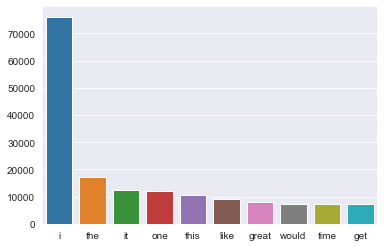

In [17]:
import seaborn as sns
# visualize food data
from sklearn.manifold import TSNE
all_words = Bag_Of_Words(ListWords)
count = []
Words  = []
for w in all_words.most_common(10):
    count.append(w[1])
    Words.append(w[0])
sns.set_style("darkgrid")
sns.barplot(Words,count)

In [18]:
#ListWords To lower case
def eliminate_irrelevent_Words(ListWords):
    ListWords1 = [] 
    for m in ListWords:
        l = [item.lower() for item in m]
        ListWords1.append(l)
    ListWords = ListWords1
    #print(ListWords)
    #elimnate words
    for m in ListWords:
        for w in m:
            if len(w) <=3:
                m.remove(w)
            if w == 'this':
                m.remove(w)
    return ListWords
def eliminate_irrelevent_Word(Word):
    #print(ListWords)
    #elimnate words
    Word = RegExpTokenizer(Word)
    Word = [item.lower() for item in Word]
    for m in Word:
        if len(m) <=3:
            Word.remove(m)
        if m == 'this':
            Word.remove(m)
    return Word

In [19]:
import random
def Create_Document(Reviews,ListWords):
    ListClass = list(Reviews['Class'])
    Documents =  []
    for m in range(len(ListWords)):
        Documents.append((ListWords[m],ListClass[m]))
    print(Documents[0])
    #shuffle
    random.shuffle(Documents)
    return Documents
#on va utiliser Reviews Books
Documents = Create_Document(Reviews,ListWords)

(['GOOD', 'LOOKING', 'KICKS', 'IF', 'YOUR', 'KICKIN', 'IT', 'OLD', 'SCHOOL', 'LIKE', 'ME', 'AND', 'COMFORTABLE', 'AND', 'RELATIVELY', 'CHEAP', 'I', 'LL', 'ALWAYS', 'KEEP', 'A', 'PAIR', 'OF', 'STAN', 'SMITH', 'S', 'AROUND', 'FOR', 'WEEKENDS'], 'pos')


In [20]:
def find_features(document,all_words,nbr_word):
    Most_Comm_Word = []    
    for w in all_words.most_common(nbr_word):
        Most_Comm_Word.append(w[0])

    word_features = Most_Comm_Word
    words = RegExpTokenizer(document)
    #print(words)
    features = {}
    for w in word_features:
        features[w] = (w in words)

    return features
print(find_features('im road going to tunisia .',all_words,100))

{'i': False, 'the': False, 'it': False, 'one': False, 'this': False, 'like': False, 'great': False, 'would': False, 'time': False, 'get': False, 'good': False, 'product': False, 'use': False, 'well': False, 'work': False, 'year': False, 'love': False, 'really': False, 'bought': False, 'even': False, 'first': False, 'much': False, 'also': False, 'make': False, 'book': False, 'movie': False, 'game': False, 'my': False, 'buy': False, 'thing': False, 'better': False, 'little': False, 'got': False, 'if': False, 'back': False, 'used': False, 'look': False, 'two': False, 'best': False, 'day': False, 'could': False, 'way': False, 'they': False, 'go': False, 'still': False, 'new': False, 'old': False, 'magazine': False, '2': False, 'never': False, 'price': False, 'many': False, 'easy': False, 'made': False, 'quality': False, 'camera': False, 'problem': False, 'we': False, 'think': False, 'month': False, 'know': False, 'say': False, 'read': False, 'want': False, 'take': False, 'find': False, 're

In [21]:
def Features_Set(all_words,Documents,nbr_word):
    #list(all_words.keys())[:1000]
    #featuresets = [(find_features(rev), category) for (rev, category) in Documents]
    featuresets = []
    for rev,cat in Documents:
        #print(' '.join(rev),cat)
        feature = find_features(' '.join(rev),all_words,nbr_word)
        #print(feature)
        featuresets.append((feature,cat))
    return featuresets

In [22]:
featuresets = Features_Set(all_words,Documents,100)

In [23]:
Reviews.to_csv("Reviews.csv", sep='\t', encoding='utf-8')

In [9]:
import re
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
import keras
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import math
import nltk

In [10]:
Reviews = pd.read_csv('Reviews.csv',sep = '\t')

In [11]:
data =  Reviews.loc[:,'review_text':'Class']
data.head()

,review_text,Class
0,GOOD LOOKING KICKS IF YOUR KICKIN IT OLD SCHOO...,pos
1,These sunglasses are all right. They were a li...,pos
2,I don't see the difference between these bodys...,pos
3,Very nice basic clothing. I think the size is...,pos
4,I love these socks. They fit great (my 15 mont...,pos


In [12]:
def remove_tags(string):
    # removelist = ""
    result = str(string)
    # result = ' '.join(ch for ch in string if(ch.isalnum() or ' '))    #remove non-alphanumeric characters 
    # result = result.lower()
    return result
data['review_text']=data['review_text'].apply(lambda cw : remove_tags(cw))
data['review_text']

0        GOOD LOOKING KICKS IF YOUR KICKIN IT OLD SCHOO...
1        These sunglasses are all right. They were a li...
2        I don't see the difference between these bodys...
3        Very nice basic clothing.  I think the size is...
4        I love these socks. They fit great (my 15 mont...
                               ...                        
38543    I live in the UK and Amazon doesn't allow me t...
38544    This film is about a female student at Randolp...
38545    Let's face it. Nothing anyone says can sway a ...
38546    I live in the UK and Amazon doesn't allow me t...
38547    This series is being sold with missing episode...
Name: review_text, Length: 38548, dtype: object

In [13]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
    
data['review_text'] = data['review_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [14]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
def lemmatize_text(text):
    st = ""
    for w in w_tokenizer.tokenize(text):
        st = st + lemmatizer.lemmatize(w) + " "
    return st
data['review_text'] = data.review_text.apply(lemmatize_text)
data.head()
data.tail()

,review_text,Class
38543,I live UK Amazon allow download ANY NCIS shows...,neg
38544,This film female student Randolph University A...,neg
38545,Let's face it. Nothing anyone say sway particu...,neg
38546,I live UK Amazon allow download ANY NCIS shows...,neg
38547,"This series sold missing episodes, like many o...",neg


In [15]:
s = 0.0
for i in data['review_text']:
    word_list = i.split()
    s = s + len(word_list)
print("Average length of each review : ",s/data.shape[0])
pos = 0
for i in range(data.shape[0]):
    if data.iloc[i]['Class'] == 'pos':
        pos = pos + 1
neg = data.shape[0]-pos
print("Percentage of reviews with positive sentiment is "+str(pos/data.shape[0]*100)+"%")
print("Percentage of reviews with negative sentiment is "+str(neg/data.shape[0]*100)+"%")

Average length of each review :  36.83036733423265
Percentage of reviews with positive sentiment is 56.99906609940852%
Percentage of reviews with negative sentiment is 43.00093390059147%


In [16]:
reviews = data['review_text'].values
labels = data['Class'].values
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(labels)

In [17]:
train_sentences, test_sentences, train_labels, test_labels = train_test_split(reviews, encoded_labels, stratify = encoded_labels)

In [25]:
# Hyperparameters of the model
vocab_size = 3000 # choose based on statistics
oov_tok = ''
embedding_dim = 100
max_length = 200 # choose based on statistics, for example 150 to 200
padding_type='post'
trunc_type='post'
# tokenize sentences
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index
# convert train dataset to sequence and pad sequences
# convert Test dataset to sequence and pad sequences
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, padding='post', maxlen=max_length)

In [34]:
# model initialization
model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.Bidirectional(keras.layers.LSTM(64)),
    keras.layers.Dense(24, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
# compile model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 100)          300000    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              84480     
 l)                                                              
                                                                 
 dense (Dense)               (None, 24)                3096      
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 387,601
Trainable params: 387,601
Non-trainable params: 0
_________________________________________________________________


In [35]:
num_epochs = 50
history = model.fit(train_padded, train_labels, 
                    epochs=num_epochs, verbose=1, 
                    validation_split=0.1)

Epoch 1/50
814/814 [==============================] - 71s 84ms/step - loss: 0.4885 - accuracy: 0.7589 - val_loss: 0.4383 - val_accuracy: 0.7880
Epoch 2/50
814/814 [==============================] - 57s 71ms/step - loss: 0.3801 - accuracy: 0.8323 - val_loss: 0.4156 - val_accuracy: 0.8060
Epoch 3/50
814/814 [==============================] - 64s 78ms/step - loss: 0.3433 - accuracy: 0.8529 - val_loss: 0.4064 - val_accuracy: 0.8077
Epoch 4/50
814/814 [==============================] - 68s 84ms/step - loss: 0.3031 - accuracy: 0.8719 - val_loss: 0.4272 - val_accuracy: 0.8012
Epoch 5/50
814/814 [==============================] - 70s 86ms/step - loss: 0.2697 - accuracy: 0.8901 - val_loss: 0.4639 - val_accuracy: 0.8015
Epoch 6/50
814/814 [==============================] - 66s 80ms/step - loss: 0.2367 - accuracy: 0.9071 - val_loss: 0.4992 - val_accuracy: 0.8029
Epoch 7/50
814/814 [==============================] - 64s 79ms/step - loss: 0.2011 - accuracy: 0.9235 - val_loss: 0.5123 - val_accuracy:

In [36]:
prediction = model.predict(test_padded)

302/302 [==============================] - 7s 22ms/step


In [37]:
pred_labels = []
for i in prediction:
    if i >= 0.8:
        pred_labels.append(5)
    elif i>=0.6:
        pred_labels.append(4)
    elif i>=0.4:
        pred_labels.append(3)
    elif i>=0.2:
        pred_labels.append(2)
    elif i>0:
        pred_labels.append(1)
    else:
        pred_labels.append(0)
        
sum(pred_labels)/len(pred_labels)

In [39]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [41]:
print(sum(pred_labels)/len(pred_labels))

3.343467884196327


In [1]:
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [26]:
loaded_model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [27]:
prediction = loaded_model.predict(test_padded)

302/302 [==============================] - 12s 37ms/step


In [48]:
loaded_model.dtype

'float32'